In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

%matplotlib inline

# La pizza

Prenons comme exemple le prix des pizzas par diametre.

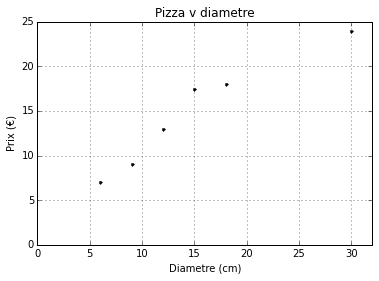

In [2]:
Diametre = [[6], [9], [12], [15], [18], [30]]
prix = [[7], [9], [13], [17.5], [18], [24]]
plt.figure()
plt.title('Pizza v diametre')
plt.xlabel('Diametre (cm)')
plt.ylabel(u'Prix (€)')
plt.plot(Diametre, prix, 'k.')
plt.axis([0, 32, 0, 25])
plt.grid(True)
plt.show()

Et si on trouvait une pizza de 25 cm de diametre.  Quel serait un prix raisonnable selon notre modèle?

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = Diametre
y = prix
model.fit(X, y)
print(u'Un pizza à 25 cm doit coûter {px:.2f} €'.format(
        px=model.predict([12])[0][0]))

Un pizza à 25 cm doit coûter 12.60 €


La class `sklearn.linear_model.LinearRegression` est un estimateur (_estimator_).  Un estimateur prédit une valeur à partir de données observées.  Brèf, ça crée un modèle.

Tous les estimateurs en scikit-learn implémentent les méthodes `fit()` et `predict()`.

# Example : la diabète

Scikit-learn propose des exemples d'ensemble de données (example data sets, plus couramment).

Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


/home/jeff/src/jma/talks/2015-11__ML/venv/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


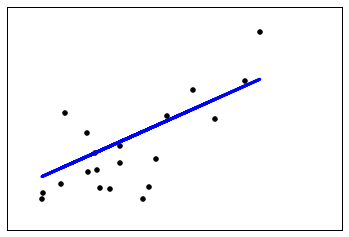

In [9]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Exercise

Visualiser notre modèle du prix de pizzas avec la pizza (le point) que nous avons ajouté.

Quel est le modèle de régression : $\theta_0 x + \theta_1$ ?

Quel est la valeur du _cost function_  $J(\theta) = \sum_{i=1}^m (h_\theta(x_i) - y_i)^2$